### ML.ai Week 1 - Exploratory Data Analysis with Pandas

In [26]:
#install packages
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
df = pd.read_csv("C:/Users/bbiesbro/Python Projects Kaggle/ML.ai/Week 1/Data/adult.csv")

In [15]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Data Dictionary

![](data_description.png)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Questions

###### 1. How many men and women (sex feature) are represented in this dataset?

In [23]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

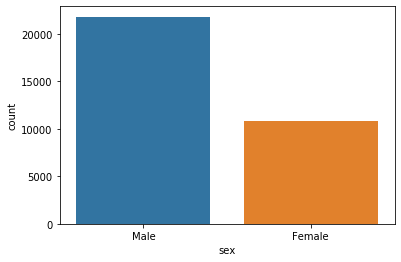

In [29]:
sns.countplot(x='sex', data=df)

Thus, 21 790 Males and 10 771 Females are represented in this dataset. 

###### 2. What is the average age (age feature) of women?

In [30]:
df['age'].mean()

38.58164675532078

In [37]:
df[df['sex'] == 'Female']['age'].mean()

36.85823043357163

Thus, the average age overall is 38.6. However, the average femaly is slightly younger at 36.9 years.

##### 3. What is the percentage of German citizens (native-country feature)?

In [58]:
df['native-country'].value_counts().head()

United-States    29170
Mexico             643
?                  583
Philippines        198
Germany            137
Name: native-country, dtype: int64

In [48]:
df['native-country'].value_counts(normalize=True)

United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

In [112]:
float((df['native-country'] == 'Germany').sum()/df.shape[0])

0.004207487485028101

A large majority of this dataset has the US as their home country. 0.42% are from Germany.

##### 4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?

In [59]:
df.groupby(['salary'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0


The average age of those making less than 50K is 36.8 with a stdv of 14. 

The average age of those making more than 50K is 44.2 years with a stdv of 10.5.

##### 6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [113]:
df[df['salary'] == '>50K']['education'].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

In [114]:
df[df['salary'] == '>50K']['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

There are plenty of people who make more than 50K who did not finish their high school education.

##### 7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [116]:
for (race, sex), sub_df in df.groupby(['race', 'sex']):
    print('Race: {0}, sex: {1}'.format(race,sex))
    print(sub_df['age']. describe())

Race: Amer-Indian-Eskimo, sex: Female
count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64
Race: Amer-Indian-Eskimo, sex: Male
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Female
count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Male
count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64
Race: Black, sex: Female
count    1555.000000
mean       37.854019
std        12.637197
min        17.000000

The maximum age of men of Amer-Indian-Eskimo race is 82.

##### 8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [137]:
df_me = df[(df['salary'] == '>50K') & (df['sex'] == 'Male')]

In [138]:
df_me.groupby(['marital-status']).describe()

age                                                 \
                        count       mean        std   min   25%   50%    75%   
marital-status                                                                 
Divorced                284.0  45.721831   8.683892  26.0  40.0  45.0  51.25   
Married-AF-spouse         4.0  31.250000   5.909033  27.0  28.5  29.0  31.75   
Married-civ-spouse     5938.0  44.883799  10.346546  21.0  37.0  44.0  52.00   
Married-spouse-absent    23.0  47.217391  12.150408  29.0  40.0  43.0  49.50   
Never-married           325.0  37.261538   9.974778  19.0  30.0  36.0  43.00   
Separated                49.0  42.714286   9.787322  23.0  36.0  42.0  50.00   
Widowed                  39.0  60.974359  11.941716  35.0  52.0  58.0  71.00   

                             fnlwgt                 ... capital-loss          \
                        max   count           mean  ...          75%     max   
marital-status                                      ...                        
Divorced               65.0   284.0  187774.246479  ...          0.0  2824.0   
Married-AF-spouse      40.0     4.0   99242.000000  ...          0.0     0.0   
Married-civ-spouse     90.0  5938.0  188474.476591  ...          0.0  2415.0   
Married-spouse-absent  77.0    23.0  154836.086957  ...          0.0  1564.0   
Never-married          90.0   325.0  198613.683077  ...          0.0  3004.0   
Separated              61.0    49.0  208725.612245  ...          0.0  2824.0   
Widowed                81.0    39.0  162954.487179  ...          0.0  2392.0   

                      hours-per-week                                          \
                               count       mean        std   min   25%   50%   
marital-status                                                                 
Divorced                       284.0  48.919014  11.000022   5.0  40.0  48.0   
Married-AF-spouse                4.0  46.000000   4.898979  40.0  43.0  47.0   
Married-civ-spouse            5938.0  46.244022  10.720902   1.0  40.0  43.0   
Married-spouse-absent           23.0  44.391304  13.469626  20.0  40.0  40.0   
Never-married                  325.0  46.867692   9.834951   7.0  40.0  45.0   
Separated                       49.0  47.163265   9.287866  32.0  40.0  45.0   
Widowed                         39.0  42.384615  14.351995   2.0  40.0  40.0   

                                   
                        75%   max  
marital-status                     
Divorced               55.0  99.0  
Married-AF-spouse      50.0  50.0  
Married-civ-spouse     50.0  99.0  
Married-spouse-absent  52.5  70.0  
Never-married          50.0  90.0  
Separated              50.0  80.0  
Widowed                50.0  80.0  

[7 rows x 48 columns]

There are a lot more married men than non-married men making over 50K.

##### 9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [98]:
df['hours-per-week'].max()

99

In [125]:
df[df['hours-per-week'] == 99].count()

age               85
workclass         85
fnlwgt            85
education         85
education-num     85
marital-status    85
occupation        85
relationship      85
race              85
sex               85
capital-gain      85
capital-loss      85
hours-per-week    85
native-country    85
salary            85
dtype: int64

In [134]:
max_load = df['hours-per-week'].max()
print("Max time - {0} hours./week.".format(max_load))

num_workaholics = df[df['hours-per-week'] == max_load].shape[0]
print("Total number of such hard workers {0}".format(num_workaholics))

rich_share = float(df[(df['hours-per-week'] == max_load)
                 & (df['salary'] == '>50K')].shape[0]) / num_workaholics
print("Percentage of rich among them {0}%".format(int(100 * rich_share)))

Max time - 99 hours./week.
Total number of such hard workers 85
Percentage of rich among them 29%


##### 10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?

In [118]:
for (country, salary), sub_df in df.groupby(['native-country', 'salary']):
    print(country, salary, round(sub_df['hours-per-week'].mean(), 2))

? <=50K 40.16
? >50K 45.55
Cambodia <=50K 41.42
Cambodia >50K 40.0
Canada <=50K 37.91
Canada >50K 45.64
China <=50K 37.38
China >50K 38.9
Columbia <=50K 38.68
Columbia >50K 50.0
Cuba <=50K 37.99
Cuba >50K 42.44
Dominican-Republic <=50K 42.34
Dominican-Republic >50K 47.0
Ecuador <=50K 38.04
Ecuador >50K 48.75
El-Salvador <=50K 36.03
El-Salvador >50K 45.0
England <=50K 40.48
England >50K 44.53
France <=50K 41.06
France >50K 50.75
Germany <=50K 39.14
Germany >50K 44.98
Greece <=50K 41.81
Greece >50K 50.62
Guatemala <=50K 39.36
Guatemala >50K 36.67
Haiti <=50K 36.33
Haiti >50K 42.75
Holand-Netherlands <=50K 40.0
Honduras <=50K 34.33
Honduras >50K 60.0
Hong <=50K 39.14
Hong >50K 45.0
Hungary <=50K 31.3
Hungary >50K 50.0
India <=50K 38.23
India >50K 46.48
Iran <=50K 41.44
Iran >50K 47.5
Ireland <=50K 40.95
Ireland >50K 48.0
Italy <=50K 39.62
Italy >50K 45.4
Jamaica <=50K 38.24
Jamaica >50K 41.1
Japan <=50K 41.0
Japan >50K 47.96
Laos <=50K 40.38
Laos >50K 40.0
Mexico <=50K 40.0
Mexico >50K 46

In [120]:
pd.crosstab(df['native-country'], df['salary'], 
           values=df['hours-per-week'], aggfunc=np.mean).T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,...,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,...,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5


Average work hours per week for Japan per income group:

    <=50K 41.0
    >50K  47.96
   